<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.1

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [446]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [351]:
# Read Titanic Dataset
titanic_csv = '.../../titanic.csv'
titanic = pd.read_csv(titanic_csv)

# Explore Dataset

## Head

In [352]:
# Check Head
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Tail

In [353]:
# Check Tail
titanic.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

## Shape

Find shape of dataset.

In [354]:
# ANSWER
titanic.shape

(891, 12)

## Check Types of Data

Check types of data you have

In [355]:
# ANSWER
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Check Null Values

Check whether dataset have any null values.

In [356]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [357]:
# Check titanic data again
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [358]:
titanic[titanic['Age']< 19]

PassengerId  Survived  Pclass                                  Name  \
7              8         0       3        Palsson, Master. Gosta Leonard   
9             10         1       2   Nasser, Mrs. Nicholas (Adele Achem)   
10            11         1       3       Sandstrom, Miss. Marguerite Rut   
14            15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
16            17         0       3                  Rice, Master. Eugene   
..           ...       ...     ...                                   ...   
852          853         0       3               Boulos, Miss. Nourelain   
853          854         1       1             Lines, Miss. Mary Conover   
855          856         1       3            Aks, Mrs. Sam (Leah Rosen)   
869          870         1       3       Johnson, Master. Harold Theodor   
875          876         1       3      Najib, Miss. Adele Kiamie "Jane"   

        Sex   Age  SibSp  Parch    Ticket     Fare Cabin Embarked  
7      male   2.0      3      1    349909  21.0750   NaN        S  
9    female  14.0      1      0    237736  30.0708   NaN        C  
10   female   4.0      1      1   PP 9549  16.7000    G6        S  
14   female  14.0      0      0    350406   7.8542   NaN        S  
16     male   2.0      4      1    382652  29.1250   NaN        Q  
..      ...   ...    ...    ...       ...      ...   ...      ...  
852  female   9.0      1      1      2678  15.2458   NaN        C  
853  female  16.0      0      1  PC 17592  39.4000   D28        S  
855  female  18.0      0      1    392091   9.3500   NaN        S  
869    male   4.0      1      1    347742  11.1333   NaN        S  
875  female  15.0      0      0      2667   7.2250   NaN        C  

[139 rows x 12 columns]

In [359]:
#Maybe we can separate the last names - and create a new feature "Family"

titanic[['Family_Name', 'First_Name']]=titanic['Name'].str.split(',', n=1, expand = True)
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Family_Name  \
0      0         A/5 21171   7.2500   NaN        S      Braund   
1      0          PC 17599  71.2833   C85        C     Cumings   
2      0  STON/O2. 3101282   7.9250   NaN        S   Heikkinen   
3      0            113803  53.1000  C123        S    Futrelle   
4      0            373450   8.0500   NaN        S       Allen   

                                    First_Name  
0                              Mr. Owen Harris  
1   Mrs. John Bradley (Florence Briggs Thayer)  
2                                  Miss. Laina  
3           Mrs. Jacques Heath (Lily May Peel)  
4                            Mr. William Henry

In [360]:
titanic['Family_Name'].value_counts()

Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: Family_Name, Length: 667, dtype: int64

In [361]:
titanic[titanic['Family_Name']=='Panula']

PassengerId  Survived  Pclass                                    Name  \
50            51         0       3              Panula, Master. Juha Niilo   
164          165         0       3            Panula, Master. Eino Viljami   
266          267         0       3               Panula, Mr. Ernesti Arvid   
638          639         0       3  Panula, Mrs. Juha (Maria Emilia Ojala)   
686          687         0       3                Panula, Mr. Jaako Arnold   
824          825         0       3            Panula, Master. Urho Abraham   

        Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked Family_Name  \
50     male   7.0      4      1  3101295  39.6875   NaN        S      Panula   
164    male   1.0      4      1  3101295  39.6875   NaN        S      Panula   
266    male  16.0      4      1  3101295  39.6875   NaN        S      Panula   
638  female  41.0      0      5  3101295  39.6875   NaN        S      Panula   
686    male  14.0      4      1  3101295  39.6875   NaN        S      Panula   
824    male   2.0      4      1  3101295  39.6875   NaN        S      Panula   

                          First_Name  
50                Master. Juha Niilo  
164             Master. Eino Viljami  
266                Mr. Ernesti Arvid  
638   Mrs. Juha (Maria Emilia Ojala)  
686                 Mr. Jaako Arnold  
824             Master. Urho Abraham

In [362]:
#Master seems to be always kids? Maybe we should create a separate field for this
titanic[['Honorific','Actual_Name']]=titanic['First_Name'].str.split('.', n=1, expand = True)
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Family_Name  \
0      0         A/5 21171   7.2500   NaN        S      Braund   
1      0          PC 17599  71.2833   C85        C     Cumings   
2      0  STON/O2. 3101282   7.9250   NaN        S   Heikkinen   
3      0            113803  53.1000  C123        S    Futrelle   
4      0            373450   8.0500   NaN        S       Allen   

                                    First_Name Honorific  \
0                              Mr. Owen Harris        Mr   
1   Mrs. John Bradley (Florence Briggs Thayer)       Mrs   
2                                  Miss. Laina      Miss   
3           Mrs. Jacques Heath (Lily May Peel)       Mrs   
4                            Mr. William Henry        Mr   

                              Actual_Name  
0                             Owen Harris  
1   John Bradley (Florence Briggs Thayer)  
2                                   Laina  
3           Jacques Heath (Lily May Peel)  
4                           William Henry

In [363]:
titanic.shape

(891, 16)

In [364]:
titanic = titanic.drop('First_Name',1)

C:\Users\jadea\AppData\Local\Temp\ipykernel_21604\694812060.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  titanic = titanic.drop('First_Name',1)


In [365]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Name',
       'Honorific', 'Actual_Name'],
      dtype='object')

In [366]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Family_Name Honorific  \
0      0         A/5 21171   7.2500   NaN        S      Braund        Mr   
1      0          PC 17599  71.2833   C85        C     Cumings       Mrs   
2      0  STON/O2. 3101282   7.9250   NaN        S   Heikkinen      Miss   
3      0            113803  53.1000  C123        S    Futrelle       Mrs   
4      0            373450   8.0500   NaN        S       Allen        Mr   

                              Actual_Name  
0                             Owen Harris  
1   John Bradley (Florence Briggs Thayer)  
2                                   Laina  
3           Jacques Heath (Lily May Peel)  
4                           William Henry

In [367]:
titanic['Honorific'] = titanic['Honorific'].str.strip()

In [368]:
titanic[titanic['Honorific'] == 'Master']

PassengerId  Survived  Pclass  \
7              8         0       3   
16            17         0       3   
50            51         0       3   
59            60         0       3   
63            64         0       3   
65            66         1       3   
78            79         1       2   
125          126         1       3   
159          160         0       3   
164          165         0       3   
165          166         1       3   
171          172         0       3   
176          177         0       3   
182          183         0       3   
183          184         1       2   
193          194         1       2   
261          262         1       3   
278          279         0       3   
305          306         1       1   
340          341         1       2   
348          349         1       3   
386          387         0       3   
407          408         1       2   
445          446         1       1   
480          481         0       3   
489          490         1       3   
549          550         1       2   
709          710         1       3   
751          752         1       3   
755          756         1       2   
787          788         0       3   
788          789         1       3   
802          803         1       1   
803          804         1       3   
819          820         0       3   
824          825         0       3   
827          828         1       2   
831          832         1       2   
850          851         0       3   
869          870         1       3   

                                                  Name   Sex    Age  SibSp  \
7                       Palsson, Master. Gosta Leonard  male   2.00      3   
16                                Rice, Master. Eugene  male   2.00      4   
50                          Panula, Master. Juha Niilo  male   7.00      4   
59                  Goodwin, Master. William Frederick  male  11.00      5   
63                               Skoog, Master. Harald  male   4.00      3   
65                            Moubarek, Master. Gerios  male    NaN      1   
78                       Caldwell, Master. Alden Gates  male   0.83      0   
125                       Nicola-Yarred, Master. Elias  male  12.00      1   
159                         Sage, Master. Thomas Henry  male    NaN      8   
164                       Panula, Master. Eino Viljami  male   1.00      4   
165    Goldsmith, Master. Frank John William "Frankie"  male   9.00      0   
171                               Rice, Master. Arthur  male   4.00      4   
176                      Lefebre, Master. Henry Forbes  male    NaN      3   
182              Asplund, Master. Clarence Gustaf Hugo  male   9.00      4   
183                          Becker, Master. Richard F  male   1.00      2   
193                         Navratil, Master. Michel M  male   3.00      1   
261                  Asplund, Master. Edvin Rojj Felix  male   3.00      4   
278                                 Rice, Master. Eric  male   7.00      4   
305                     Allison, Master. Hudson Trevor  male   0.92      1   
340                     Navratil, Master. Edmond Roger  male   2.00      1   
348             Coutts, Master. William Loch "William"  male   3.00      1   
386                    Goodwin, Master. Sidney Leonard  male   1.00      5   
407                     Richards, Master. William Rowe  male   3.00      1   
445                          Dodge, Master. Washington  male   4.00      0   
480                     Goodwin, Master. Harold Victor  male   9.00      5   
489              Coutts, Master. Eden Leslie "Neville"  male   9.00      1   
549                     Davies, Master. John Morgan Jr  male   8.00      1   
709  Moubarek, Master. Halim Gonios ("William George")  male    NaN      1   
751                                Moor, Master. Meier  male   6.00      0   
755                          Hamalainen, Master. Viljo  male   0.67      1   
787                         

In [369]:
titanic.groupby(['Honorific']).Age.median()

Honorific
Capt            70.0
Col             58.0
Don             40.0
Dr              46.5
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           3.5
Miss            21.0
Mlle            24.0
Mme             24.0
Mr              30.0
Mrs             35.0
Ms              28.0
Rev             46.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64

## Fill Null Values

Is there any null values in any columns? 

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every steps

### Age

In [370]:
# ANSWER

#We can fill out values of the missing age by  associating them with 3 categories, Pclass, Sex, Embarked & Honorific
#People from a higher Pclass could reasonably be higher in age since they would have to earn higher, and this would be especially true with males
#Embarked would also affect their income level, if average income in Cherbourg was higher in Queenstown, 
#then males embarking from that city could be younger while still making as much money as the older guys from QUeenstown
#Population density and demographics of the city would affect the age as well, Pclass 2 males are extremely old - might be retirees?
# It would also be good to include the Parch features, however it does not let us know if it's a child or a parent
#Masters are kids, Miss are younger than Mrs, Rev and Sirs are generally older
titanic.groupby(['Pclass', 'Sex', 'Embarked', 'Honorific']).Age.median()

Pclass  Sex     Embarked  Honorific   
1       female  C         Lady            48.00
                          Miss            31.50
                          Mlle            24.00
                          Mme             24.00
                          Mrs             44.00
                Q         Miss            33.00
                S         Dr              49.00
                          Miss            23.00
                          Mrs             39.00
                          the Countess    33.00
        male    C         Col             56.00
                          Don             40.00
                          Dr              32.00
                          Mr              36.00
                          Sir             49.00
                Q         Dr              44.00
                S         Capt            70.00
                          Col             60.00
                          Dr              50.00
                          Jonkheer        38.00
 

In [371]:
titanic.groupby(by= ['Pclass', 'Sex', 'Embarked', 'Honorific'])['Age'].transform('median')

0      26.0
1      44.0
2      19.0
3      39.0
4      26.0
       ... 
886    42.0
887    23.0
888    19.0
889    36.0
890    31.5
Name: Age, Length: 891, dtype: float64

In [372]:
titanic['Age'].fillna(titanic.groupby(by= ['Pclass', 'Sex', 'Embarked', 'Honorific'])['Age'].transform('median'), inplace = True)

In [373]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_Name      0
Honorific        0
Actual_Name      0
dtype: int64

### Cabin

In [374]:
# ANSWER
titanic['Cabin'].isna().sum()

687

In [375]:
titanic['Cabin'] = titanic['Cabin'].apply(lambda x: x[:1] if type(x) is str else x)
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Family_Name Honorific  \
0      0         A/5 21171   7.2500   NaN        S      Braund        Mr   
1      0          PC 17599  71.2833     C        C     Cumings       Mrs   
2      0  STON/O2. 3101282   7.9250   NaN        S   Heikkinen      Miss   
3      0            113803  53.1000     C        S    Futrelle       Mrs   
4      0            373450   8.0500   NaN        S       Allen        Mr   

                              Actual_Name  
0                             Owen Harris  
1   John Bradley (Florence Briggs Thayer)  
2                                   Laina  
3           Jacques Heath (Lily May Peel)  
4                           William Henry

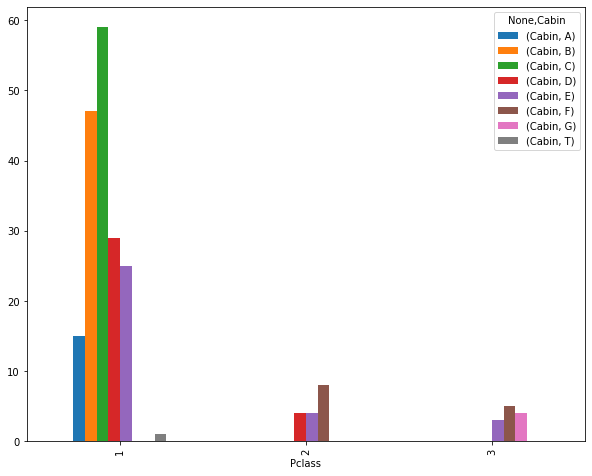

In [376]:
titanic.groupby(by=['Pclass', 'Cabin']).agg({'Cabin': 'count'}).unstack().plot(kind='bar', figsize=(10,8));

In [377]:
cabin_map = {
    'A': 1
    , 'B': 2
    , 'C': 3
    , 'D': 4
    , 'E': 5
    , 'F': 6
    , 'G': 7
    , 'T': 8
}
titanic['Cabin'] = titanic['Cabin'].map(cabin_map)

In [378]:
# Fill Cabin with Mean values
titanic['Cabin'].fillna(titanic.groupby(by=['Pclass'])['Cabin'].transform("mean"), inplace=True) 

In [379]:
# Remove Decimal Numbers
titanic['Cabin'] = np.round(titanic['Cabin'], decimals=0)

In [381]:
# Check Cabin
titanic['Cabin'].value_counts()

6.0    492
5.0    200
3.0     99
2.0     47
4.0     33
1.0     15
7.0      4
8.0      1
Name: Cabin, dtype: int64

### Embarked

In [384]:
# ANSWER
titanic[titanic['Embarked'].isna()]
# Only 2 people had Embarked  with NA

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare  Cabin Embarked Family_Name  \
61   female  38.0      0      0  113572  80.0    2.0      NaN       Icard   
829  female  62.0      0      0  113572  80.0    2.0      NaN       Stone   

    Honorific                     Actual_Name  
61       Miss                          Amelie  
829       Mrs   George Nelson (Martha Evelyn)

In [386]:
titanic['Embarked'].value_counts(normalize = True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [388]:
# Majority is from S, we can assign this to 
titanic['Embarked'] = titanic['Embarked'].apply(lambda x: x if type(x) is str else 'S')

# Describe

Describe your dataset.

In [389]:
# ANSWER
titanic.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.043089 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.066725 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.407327  0.083081  0.018443   
Age             0.043089 -0.066725 -0.407327  1.000000 -0.271185 -0.191105   
SibSp          -0.057527 -0.035322  0.083081 -0.271185  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.191105  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.117305  0.159651  0.216225   
Cabin          -0.040371 -0.289460  0.896218 -0.374146  0.080367  0.016520   

                 Fare     Cabin  
PassengerId  0.012658 -0.040371  
Survived     0.257307 -0.289460  
Pclass      -0.549500  0.896218  
Age          0.117305 -0.374146  
SibSp        0.159651  0.080367  
Parch        0.216225  0.016520  
Fare         1.000000 -0.564177  
Cabin       -0.564177  1.000000

# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [219]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
  
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.ylabel('Percentage')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

In [311]:
def bar_charts_percentage(df,feature):
    
    df.groupby(feature).Survived.value_counts(normalize = True).plot(kind = 'bar')
    plt.xlabel('Survived')
    plt.ylabel('Percentage')
    plt.show()

## Pclass

Use barchart to find relationship between survived and pclass.  Note your findings.

In [301]:
# ANSWER
bar_charts(titanic, 'Pclass')

In [302]:
bar_charts_percentage(titanic, 'Pclass')

In [ ]:
# More than Class 70% of class 3 Passengers died, compared to 50% of Class 2 Passengers

## Sex

Use barchart to find relationship between survived and sex.  Note your findings.

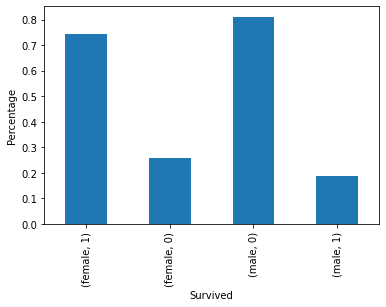

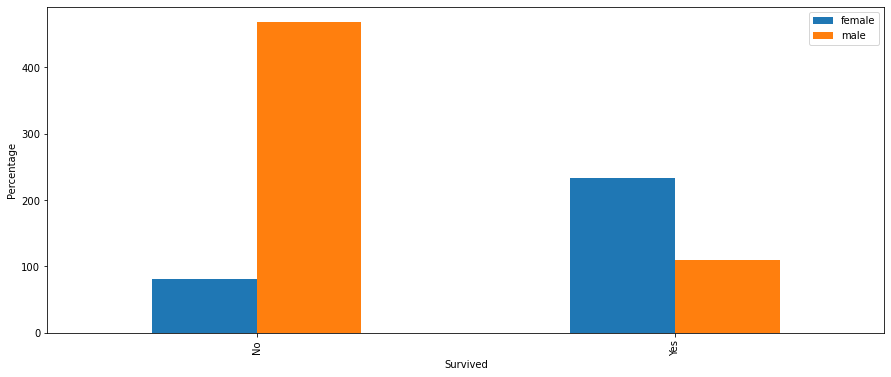

In [304]:
# ANSWER
bar_charts_percentage(titanic,'Sex')
bar_charts(titanic, 'Sex')
#More than 70% of women survived compread to 20% of male

## Parch

Parch = Number of parents of children travelling with each passenger.

In [305]:
bar_charts(titanic, 'Parch')
bar_charts_percentage(titanic, 'Parch')

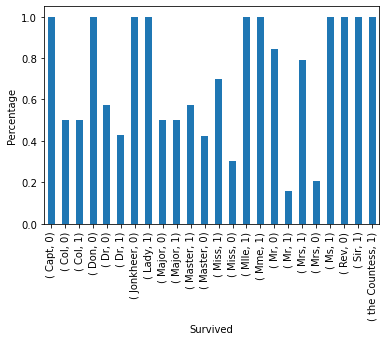

In [275]:
bar_charts_percentage(titanic, 'Honorific')


## SibSp

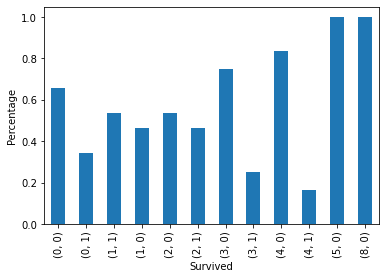

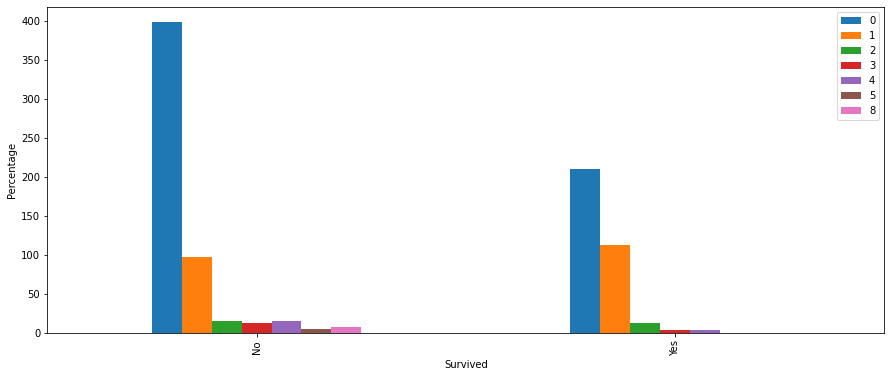

In [308]:
# ANSWER
bar_charts_percentage(titanic,'SibSp')
bar_charts(titanic, 'SibSp')
#Passengers with more siblings died more

## Embarked

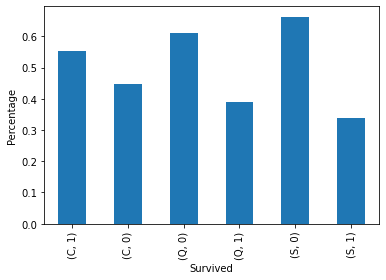

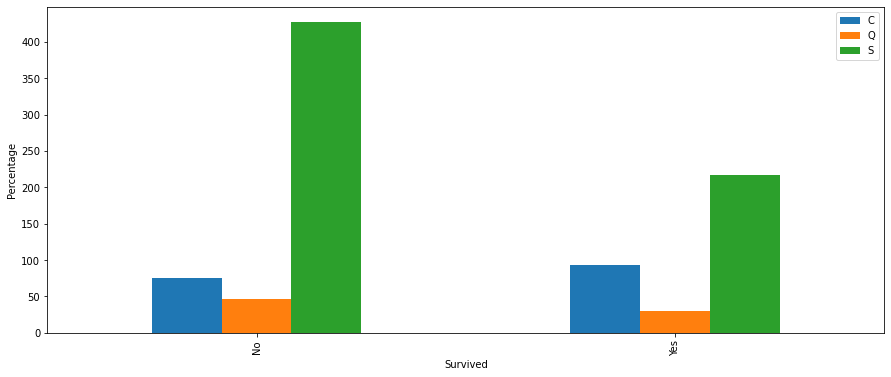

In [309]:
# ANSWER
bar_charts_percentage(titanic,'Embarked')
bar_charts(titanic, 'Embarked')
#Passengers who embarked from cheraug  were more likely to survive

# Feature Engineering

Create some new features from existing feature.

## Fare Class

Create a new class based on their fare. Is there any relationship between fare and survival? 

In [393]:
def create_fare_class(x):
    if x > 30:
        fare_class = 'Rich'
    elif x > 20 and x <= 30:
        fare_class = 'Middle'
    elif x > 10 and x <= 20:
        fare_class = 'Poor'
    else:
        fare_class = 'Poverty'
    return fare_class

In [394]:
# ANSWER
titanic['FareClass'] = titanic['Fare'].apply(create_fare_class)

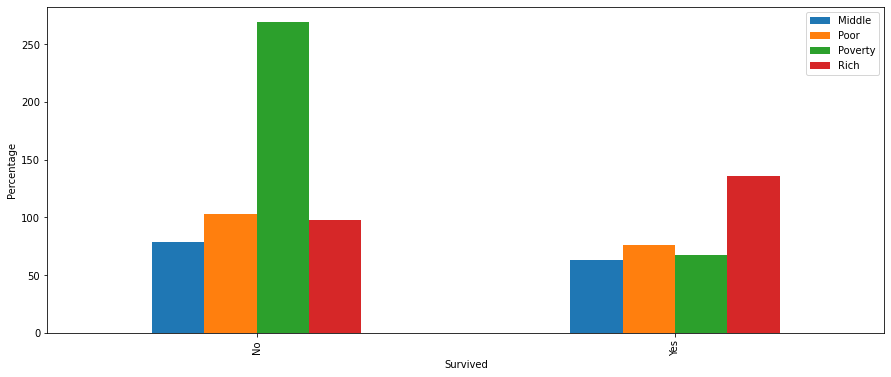

In [395]:
# ANSWER
bar_charts_percentage(titanic,'FareClass')
bar_charts(titanic, 'FareClass')
#Death rate is extremely high for those from PovertyClass, while only Rich Class has a higher survival rate

## Age Class

In [396]:
# ANSWER

In [397]:
def create_age_class(x):
    if x > 60:
        age_class = 'Retiree'
    elif x > 35 and x <= 60:
        age_class = 'Old'
    elif x > 25 and x <= 35:
        age_class = 'Middle Age'
    elif x > 16 and x <= 25:
        age_class = 'Young Adult'
    else:
        age_class = 'Children'
    return age_class

In [399]:
# ANSWER
# ANSWER
titanic['AgeClass'] = titanic['Age'].apply(create_age_class)

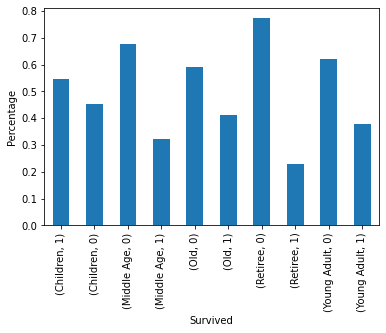

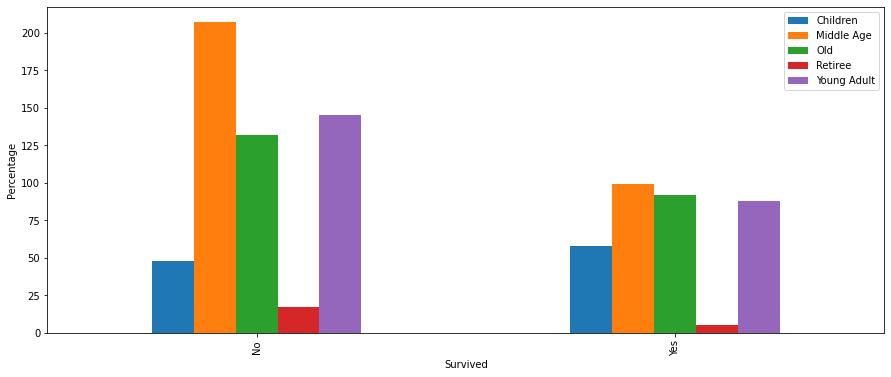

In [403]:
# ANSWER
bar_charts_percentage(titanic,'AgeClass')
bar_charts(titanic, 'AgeClass')
#Retirees & Middle Age Class have extremely high Death rate. Children are the only ones with a greater than 50% Survival rate

In [414]:
#Honorifics might have an impact on the survival rate
titanic.Honorific.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Honorific, dtype: int64

In [415]:
titanic['Honorific'].isnull().sum()

0

In [408]:
def create_honor_class(x):
    if x == 'Mr':
        honor_class = 'Mr'
    elif x == 'Miss':
        honor_class = 'Miss'
    elif x == 'Mrs':
        honor_class = 'Mrs'
    elif x == 'Master':
        honor_class = 'Master'
    else:
        honor_class = 'High-ranked'
    return honor_class

In [410]:
titanic['HonorClass'] = titanic['Honorific'].apply(create_honor_class)

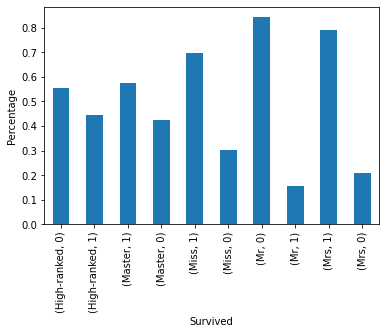

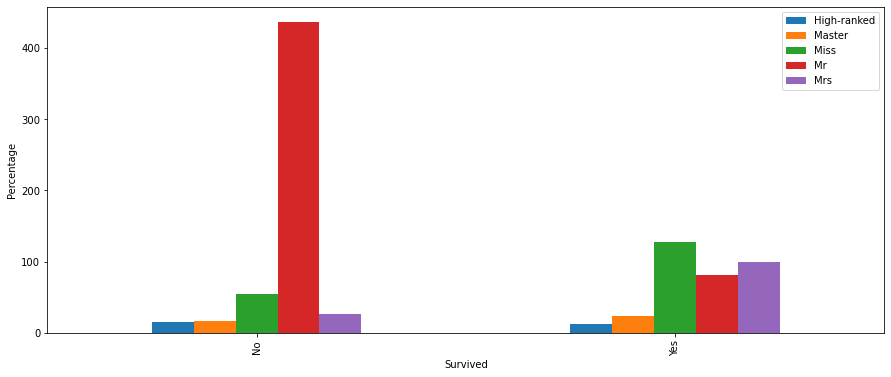

In [412]:
bar_charts_percentage(titanic,'HonorClass')
bar_charts(titanic, 'HonorClass')
#Masters, Highranks, Mrs & Miss had a higher than 50% survival rate. While Mr only had around 18%

# Statistical Overview

## Correlation

Find correlation between `survived` and other features.

In [413]:
titanic.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.043089 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.066725 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.407327  0.083081  0.018443   
Age             0.043089 -0.066725 -0.407327  1.000000 -0.271185 -0.191105   
SibSp          -0.057527 -0.035322  0.083081 -0.271185  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.191105  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.117305  0.159651  0.216225   
Cabin          -0.040371 -0.289460  0.896218 -0.374146  0.080367  0.016520   

                 Fare     Cabin  
PassengerId  0.012658 -0.040371  
Survived     0.257307 -0.289460  
Pclass      -0.549500  0.896218  
Age          0.117305 -0.374146  
SibSp        0.159651  0.080367  
Parch        0.216225  0.016520  
Fare         1.000000 -0.564177  
Cabin       -0.564177  1.000000

# [BONUS] Hypothesis Testing
---
The usual process of null hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the p-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the p-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group. 

Collect two sets of data, one with the passenger greater than 35 years of age and another one with the passenger younger than 35. The sample size should ideally be the same but it can be different. Lets say that the sample sizes is 100.

In [426]:
# ANSWER
Agedivide = 16
Rstate = 42

titanic_young = titanic[titanic['Age'] <= Agedivide].sample(100, random_state=Rstate)
titanic_old = titanic[titanic['Age'] > Agedivide].sample(100, random_state=Rstate)

In [427]:
titanic_young['Survived'].value_counts()

1    55
0    45
Name: Survived, dtype: int64

In [428]:
titanic_old['Survived'].value_counts()

0    65
1    35
Name: Survived, dtype: int64

In [432]:
N = 100


### Set alpha (let alpha = 0.05)

> Identify a test statistic that can be used to assess the truth of the null hypothesis.

In [430]:
# ANSWER

In [431]:
alpha = 0.05

### Calculate point estimate

In [433]:
a = titanic_young['Survived']
b = titanic_old['Survived']

In [443]:
## Calculate the variance to get the standard deviation
var_a = a.var(ddof = 1)
var_b = b.var(ddof = 1)

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

print(f" Variance of A {var_a} Variance of B {var_b} Standard Deviation {s}")

 Variance of A 0.25000000000000006 Variance of B 0.22979797979797956 Standard Deviation 0.4897948447043821


### Calculate test statistic

In [444]:
## Calculate the t-statistic
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))
t

2.887359019114729

### Find the p-value

> Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [447]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
if (t > 0):
    p = 1 - stats.t.cdf(t, df = df) 
else:
    p = stats.t.cdf(t, df = df)

In [448]:
print("t = " + str(t))
print("p = " + str(2*p))

t = 2.887359019114729
p = 0.004316621588845493


### Interpret results

> Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [449]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [451]:
## Cross Checking with the internal scipy function
print("t = " + str(t))
print("p = " + str(2*p))

t = 2.887359019114728
p = 0.004316621588845335
We reject our null hypothesis.


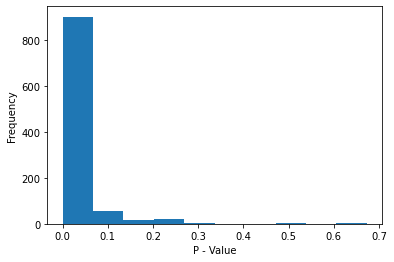

 Out of 1000 trials, we'll get 860 tests which will show a Pvalue less than 0.05
 Can we use the average Pvalue 0.029066397416697337 ?


In [489]:
#Hacker statistics - trying the experiment 100 times
tvalue = []
pvalue=[]
Num_of_Experiment= 1000

for i in range(Num_of_Experiment):

    Agedivide = 16
    Rstate = i

    titanic_young = titanic[titanic['Age'] <= Agedivide].sample(100, random_state=Rstate)
    titanic_old = titanic[titanic['Age'] > Agedivide].sample(100, random_state=Rstate)
    a = titanic_young['Survived']
    b = titanic_old['Survived']
    t3, p3 = stats.ttest_ind(a,b)
    tvalue.append(t3)
    pvalue.append(p3)

plt.hist(pvalue, bins = 10)
plt.xlabel('P - Value')
plt.ylabel('Frequency')
plt.show()

x = [i for i in pvalue if i < 0.05]
print(f" Out of {Num_of_Experiment} trials, we'll get {len(x)} tests which will show a Pvalue less than 0.05")
print(f" Can we use the average Pvalue {sum(pvalue)/len(pvalue)} ?")

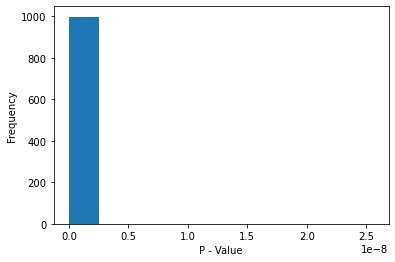

 Out of 1000 trials, we'll get 1000 tests which will show a Pvalue less than 0.05
 Can we use the average Pvalue 3.42130611099532e-11 ?


In [490]:
#Hacker statistics - trying the experiment 100 times
tvalue = []
pvalue=[]
Num_of_Experiment= 1000

for i in range(Num_of_Experiment):

    Rstate = i

    titanic_Male = titanic[titanic['Sex'] == 'male'].sample(100, random_state=Rstate)
    titanic_Female = titanic[titanic['Sex'] == 'female'].sample(100, random_state=Rstate)
    a = titanic_Male['Survived']
    b = titanic_Female['Survived']
    t3, p3 = stats.ttest_ind(a,b)
    tvalue.append(t3)
    pvalue.append(p3)

plt.hist(p=value, bins = 10)
plt.xlabel('P - Value')
plt.ylabel('Frequency')
plt.show()

x = [i for i in pvalue if i < 0.05]
print(f" Out of {Num_of_Experiment} trials, we'll get {len(x)} tests which will show a Pvalue less than 0.05")
print(f" Can we use the average Pvalue {sum(pvalue)/len(pvalue)} ?")



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



